In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as  F    

In [4]:
class RNN(nn.Module):
    def  __init__(self, input_size, hidden_size, num_layer):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first = True)
        self.hidden_size = hidden_size
        self.output = nn.Linear(hidden_size, 1)
    def forward(self, x):
        out, hidden = self.rnn(x, hidden)
        out = out.view(-1, self.hidden_size)
        out = self.output(out)
        return out, hidden

In [5]:
import pandas as  pd
data = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")

In [6]:
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [11]:
data_process = data.iloc[:,1:53]

In [12]:
data_process.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [13]:
import  random

In [14]:
random.seed(0)

In [15]:
list = []
for i in range(5):
    j = random.randint(0, data_process.shape[0]-1)
    list.append(j)


In [16]:
list

[394, 776, 430, 41, 265]

In [17]:
list.sort()

In [19]:
import matplotlib.pyplot as  plt

In [25]:
len(data_process)
data_process.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


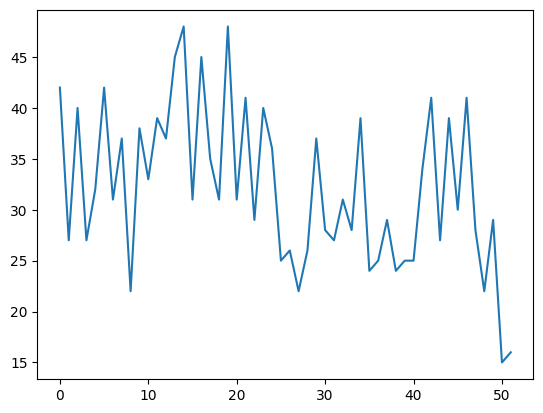

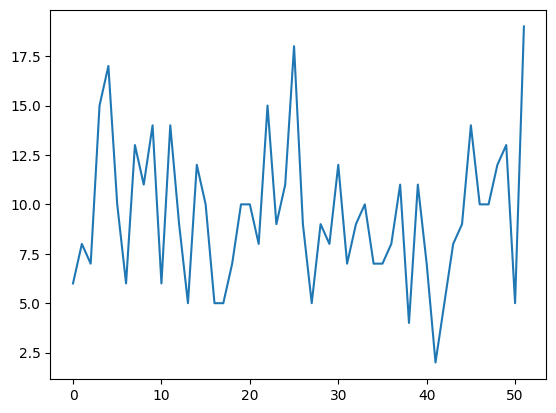

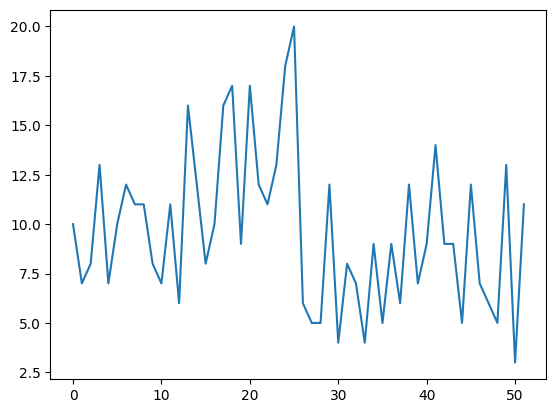

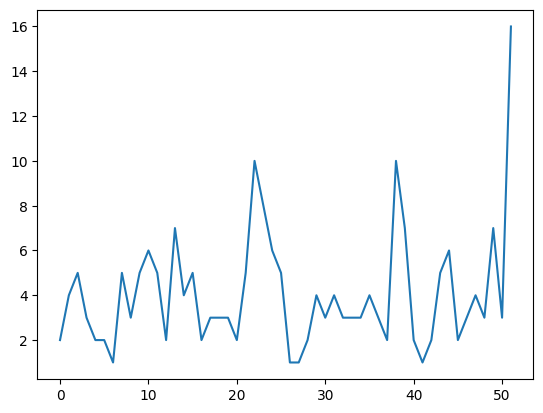

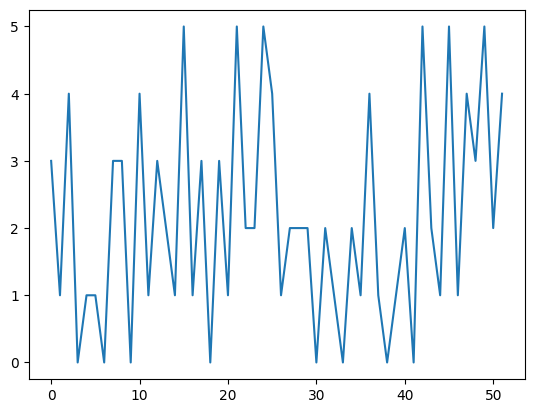

In [32]:
for i in list:
    toPlot = data_process.iloc[i,:].values
    plt.plot(toPlot)
    plt.show()

In [39]:
inputs = data_process.iloc[:, :51]

In [115]:
targets = data_process.iloc[:, 51:]
targets.shape

(811, 1)

In [108]:
class RNN(nn.Module):
    def  __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first = True)
        self.hidden_size = hidden_size
        self.output = nn.Linear(hidden_size, 1)
    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = out.view(-1, self.hidden_size)
        out = self.output(out)
        return out, hidden
    
model = RNN(51, 10, 1)

In [53]:
import sklearn
from  sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [109]:
training_data, training_targets = shuffle(inputs, targets)
x_train = training_data[:int(0.6 * len(inputs))]
y_train = training_targets[:int(0.6 * len(inputs))]
x_dev = training_data[int(0.6 * len(inputs)): int(0.8 * len(inputs))]
y_dev = training_targets[int(0.6 * len(inputs)): int(0.8 * len(inputs))]
x_test = training_data[int(0.8 * len(inputs)):]
y_test = training_targets[int(0.8 * len(inputs)):]
x_train = torch.tensor(x_train.values).float()
x_dev  = torch.tensor(x_dev.values).float()
x_test = torch.tensor(x_test.values).float()
y_train = torch.tensor(y_train.values)
y_dev = torch.tensor(y_dev.values)
y_test = torch.tensor(y_test.values)

In [130]:
model = RNN(51, 10, 1)
loss_funct = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
epochs = 10000

In [131]:
losses = []
for e in range(1, epochs + 1):
    hidden = None
    x_shuffle, y_shuffle =  shuffle(x_train, y_train)
    pred, garb = model(x_shuffle, hidden)
    # print(pred.shape, y_shuffle.shape)
    loss = loss_funct(pred, y_shuffle.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if e % 200 == 0 or e == 1:
        print(e, ": ", loss.item())
    

1 :  173.6073760986328
200 :  103.29210662841797
400 :  83.79595184326172
600 :  69.09715270996094
800 :  56.932456970214844
1000 :  47.17898941040039
1200 :  39.186683654785156
1400 :  32.64067459106445
1600 :  26.82888412475586
1800 :  22.426877975463867
2000 :  18.88974380493164
2200 :  15.880329132080078
2400 :  13.719758033752441
2600 :  11.980008125305176
2800 :  10.509109497070312
3000 :  9.631566047668457
3200 :  8.974275588989258
3400 :  8.224878311157227
3600 :  7.619936943054199
3800 :  7.177606105804443
4000 :  6.933087348937988
4200 :  6.606985569000244
4400 :  6.395462989807129
4600 :  6.265059947967529
4800 :  6.118570327758789
5000 :  6.053513526916504
5200 :  6.482979774475098
5400 :  5.9683837890625
5600 :  6.027894496917725
5800 :  5.787786483764648
6000 :  5.772672653198242
6200 :  5.765955448150635
6400 :  5.6555657386779785
6600 :  5.663010597229004
6800 :  5.593702793121338
7000 :  5.418532848358154
7200 :  5.48740816116333
7400 :  5.331666946411133
7600 :  5.285

In [144]:
model.eval()
pred= model(x_test.float(), None)
    # print(pred.shape, y_shuffle.shape)
print (loss_funct(pred, y_test.float()))

AttributeError: 'tuple' object has no attribute 'size'

In [140]:
x_test.shape

torch.Size([163, 51])

In [141]:
x_train.shape

torch.Size([486, 51])

In [142]:
y_test.shape

torch.Size([163, 1])

In [143]:
y_train.shape

torch.Size([486, 1])